In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("US_Topsearch.csv")

In [4]:
len(df)

320

In [226]:
dfc = df.drop_duplicates(subset = 'Date'and 'title')

dfc.to_csv('cleaned_US_Topsearch.csv', encoding='utf-8', index=False)

In [227]:
len(dfc)

294

In [228]:
pd.set_option('display.max_colwidth', -1)
dfc

,Date,rank,title,search,summary,source,link
0,18/11/2018,1,Alabama,500K+,Crimson Tide RB Damien Harris suffers concussion in win over Citadel,ESPN | 7h ago,http://www.espn.com/college-football/story/_/id/25304498/alabama-crimson-tide-rb-damien-harris-suffers-mild-concussion
1,18/11/2018,2,Ohio State vs Maryland,500K+,"Ohio State vs. Maryland score, takeaways: No. 10 Buckeyes escape wild battle ...",CBSSports.com | 6h ago,https://www.cbssports.com/college-football/news/ohio-state-vs-maryland-score-takeaways-no-10-buckeyes-escape-wild-battle-with-overtime-win/
2,18/11/2018,3,Notre Dame,200K+,"With Poise and Pinstripes, Notre Dame Rolls Past Syracuse in the Bronx",New York Times | 2h ago,https://www.nytimes.com/2018/11/17/sports/notre-dame-syracuse-college-football.html
3,18/11/2018,4,UCF football,200K+,"UCF vs. Cincinnati score: Live game updates, football highlights, stats, full ...",CBSSports.com | 3h ago,https://www.cbssports.com/college-football/news/ucf-vs-cincinnati-score-live-game-updates-football-highlights-stats-full-coverage/
4,18/11/2018,5,Indiana vs Michigan,100K+,Michigan vs. Indiana score: No. 4 Wolverines survive to set up winner-take-all ...,CBSSports.com | 1h ago,https://www.cbssports.com/college-football/news/michigan-vs-indiana-score-no-4-wolverines-survive-to-set-up-winner-take-all-against-ohio-state/
5,18/11/2018,6,Lakers vs Magic,50K+,Lakers vs Magic LIVE stream: How to watch LeBron James in NBA action online ...,Express.co.uk | 4h ago,https://www.express.co.uk/sport/othersport/1046812/Lakers-Magic-LIVE-stream-LeBron-James-NBA
6,18/11/2018,7,Kellie Pickler,50K+,Kellie Pickler and Her Husband Kyle Jacobs Make the Cutest Couple,countryliving.com | 15h ago,https://www.countryliving.com/life/entertainment/a25169969/kellie-pickler-husband-kyle-jacobs-love-story/
7,18/11/2018,8,Bill Maher,50K+,"Bill Maher slammed for disrespecting Stan Lee, questioning the importance of ...",USA TODAY | 11h ago,https://www.usatoday.com/story/life/people/2018/11/17/bill-maher-slammed-disrespecting-late-comic-book-writer-stan-lee/2037932002/
8,18/11/2018,9,David Arquette,50K+,David Arquette Cut Badly And Left Bloody In LA Wrestling Death Match,Vulture | 7h ago,https://www.vulture.com/2018/11/david-arquette-cut-badly-and-left-bloody-in-wrestling-match.html
9,18/11/2018,10,Canada Goose Jacket,50K+,Canada Goose Is Turning the Dressing Room Into a Freezer,Fortune | 9h ago,http://fortune.com/2018/11/17/canada-goose-jacket/


In [230]:
dfc['search'].value_counts()

100K+    84
200K+    67
50K+     60
500K+    35
2M+      19
1M+      15
20K+     7 
5M+      4 
10M+     3 
Name: search, dtype: int64

In [231]:
def convert(x):
    return{
        '10M+':1000,
        '5M+':500,
        '2M+':200,
        '1M+':100,
        '500K+':50,
        '200K+':20,
        '100K+':10,
        '50K+':5,
        '20K+':2
        
    }[x]
    
# convert the original string to interget, also make the size/10000
dfc['searchs'] = dfc['search'].apply(convert)

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [232]:
dfc.describe()

,rank,searchs
count,294.000000,294.000000
mean,10.561224,49.469388
std,5.819350,121.351114
min,1.000000,2.000000
25%,6.000000,10.000000
50%,11.000000,10.000000
75%,15.750000,50.000000
max,20.000000,1000.000000


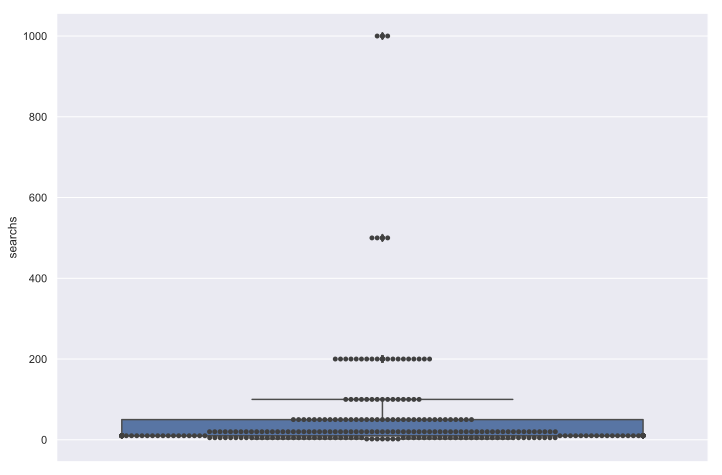

In [233]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(y=dfc['searchs'], data = dfc)
sns.swarmplot(y=dfc['searchs'], data=dfc, color=".25") #how to label the anomalies? 
# seaborn doc us useful here: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# anomalies = dfc['searchs'].


# medians = tips.groupby(['day'])['total_bill'].median().values
# median_labels = [str(np.round(s, 2)) for s in medians]

# pos = range(len(medians))
# for tick,label in zip(pos,ax.get_xticklabels()):
#     ax.text(pos[tick], medians[tick] + 0.5, median_labels[tick], 
#             horizontalalignment='center', size='x-small', color='w', weight='semibold')

## there are three most obvious anomalies here, we may ask what they are, and what conclusion can we draw from the three anomalies here?

***

# What do US people care the most in last twenty days?

In [234]:
dfc.sort_values(by ='searchs', ascending = False).head(10)

,Date,rank,title,search,summary,source,link,searchs
100,13/11/2018,1,Stan Lee,10M+,"Stan Lee, Marvel Comics' Real-Life Superhero, Dies at 95",Hollywood Reporter | 12h ago,https://www.hollywoodreporter.com/heat-vision/stan-lee-dead-marvel-comics-real-life-superhero-was-95-721450,1000
241,6/11/2018,2,where Do I vote #Electionday,10M+,"How Google, Apple, Facebook and other tech companies are getting out the vote ...",CNBC | 6d ago,https://www.cnbc.com/2018/11/06/google-facebook-and-twitter-election-day-get-out-the-vote-efforts.html,1000
240,6/11/2018,1,Election results,10M+,"Election results: Red states get redder, blue districts bluer, the partisan ...",USA TODAY | 5d ago,https://www.usatoday.com/story/news/politics/elections/2018/11/07/election-results-trump-partisanship-republicans-democrats-divide/1918468002/,1000
180,9/11/2018,1,Ian David Long,5M+,California gunman went on social media during bar attack: official,Chicago Sun-Times | 3d ago,https://chicago.suntimes.com/news/california-bar-shooting-ian-david-long-social-media/,500
221,7/11/2018,2,Beto O'Rourke,5M+,Trending: Beto O'Rourke could've used that Beyonce endorsement a bit earlier.,Washington Post | 5d ago,https://www.washingtonpost.com/express/2018/11/08/trending-beto-orourke-couldve-used-that-beyonce-endorsement-bit-earlier/,500
222,7/11/2018,3,midterm elections,5M+,How results of midterm elections will impact your money and 401(k),USA TODAY | 5d ago,https://www.usatoday.com/story/money/2018/11/08/midterm-election-stock-market-impact/1920273002/,500
220,7/11/2018,1,Stacey Abrams,5M+,Abrams campaign: We don't accept Kemp declaring himself the winner in Georgia ...,CNN | 5d ago,https://www.cnn.com/2018/11/07/politics/stacey-abrams-brian-kemp-georgia-governors-race/index.html,500
230,7/11/2018,11,California election results,2M+,"Election results 2018: Proposition 6 gas tax repeal crashes, burns [Updated]",Curbed SF | 5d ago,https://sf.curbed.com/2018/11/7/18071282/election-night-2018-california-prop-6-gas-tax-repeal-rejected,200
229,7/11/2018,10,Arizona Senate race,2M+,Democrat Kyrsten Sinema pulls ahead in Arizona Senate race,Vox | 4d ago,https://www.vox.com/2018/11/8/18075478/midterm-elections-arizona-vote-count-mcsally-sinema,200
228,7/11/2018,9,Scott Walker,2M+,How the Democrats finally defeated Wisconsin Gov. Scott Walker,Washington Post | 5d ago,https://www.washingtonpost.com/politics/how-the-democrats-finally-defeated-wisconsin-gov-scott-walker/2018/11/07/3377ed17-9cbe-4537-8b2a-acd0c37a8d35_story.html,200


# three anomalies are Stan Lee, where Do I vote #Electionday, and Election results,
# In the past twenty days, people's attentions focus on these subjects

### It seems the searchs of Stan Lee and Election are at the same weight, so do people care the same about Stan Lee and Election? Does US turn to the era of 'Amusing Ourselves to Death'?

In [235]:
Stan_Lee = dfc[dfc['title'].str.lower().str.contains('stan lee')]
# Stan_Lee
# Stan_Lee.describe()
Stan_Lee['searchs'].sum()

1000

In [236]:
election = dfc[dfc['title'].str.lower().str.contains('election')]
#election
#election.describe()
election['searchs'].sum()

3170

## through at first glance people care the same about Stan Lee and election, but it's not ture, the election searchs is over three times higher than Stan Lee.

### we know the high searchs may due to the midterm election, and the searchs seems real high (around 31700000) , so do amarican people really care about this election?

## Here I adopt GeneralMills's Google unoffical API, it could 

In [62]:
from pytrends.request import TrendReq

# Login to Google. Only need to run this once, the rest of requests will use the same session.
pytrend = TrendReq()

# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['election'])

# Interest by Region
interest_by_region_df = pytrend.interest_by_region()

interest_by_region_df.to_csv('interest_by_region_df.csv', encoding='utf-8', index=False)

interest_by_region_df.sort_values(by='election',ascending=False)[:15] #through US seems care about election a lot, the African countries cares more


,election
geoName,
Nigeria,100
Nepal,57
Ghana,48
India,46
Canada,40
Sri Lanka,38
United States,34
Kenya,33
Pakistan,30


## second point: US is the seventh here!  Nigeria is the first.

### Then we could focus on the US election.

In [ ]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() & related_queries()
pytrend.build_payload(kw_list=['election United States'])

In [34]:
# Related Queries, returns a dictionary of dataframes 
related_queries_dict = pytrend.related_queries()
related_queries_dict

{'election United States': {'top':                                                                  query  value
  0   united states 2016 election                                         100  
  1   2016 election                                                       99   
  2   2016                                                                98   
  3   vote                                                                86   
  4   where do i vote in the 2016 united states election #everyonein2016  85   
  5   2016 vote                                                           85   
  6   where do i vote in the 2016 united states election                  85   
  7   where do i vote                                                     84   
  8   united states election results                                      41   
  9   election results                                                    40   
  10  united states of america election                                   30   
  11  u

In [ ]:
words = related_queries_dict.get('election United States')
top = words.get('top')
top.to_csv('top.csv', encoding='utf-8', index=False)

In [218]:
rising = words.get('rising')
rising.to_csv('rising.csv', encoding='utf-8', index=False)

### we can spot there are some same queries in 'top' list and in 'rising' list, so we could convert the searching value in two list use same measurement.
### "where do i vote in the 2016 united states election #everyonein2016" weights 85, 5260500 in 'top' list and 'rising' list respectively, so we can do the below function:

In [219]:
def convert(x): 
    return int(x * (85 / 5260500))    

rising['value2'] = rising['value'].apply(convert)

In [220]:
rising # here we can confirm our convert by compare the query "election results 2016", it has the same weight(8) in 'top' list and new 'rising' list

,query,value,value2
0,where do i vote in the 2016 united states election #everyonein2016,5260500,85
1,2016 vote,5254450,84
2,where do i vote in the 2016 united states election,5217350,84
3,united states election results 2016,522050,8
4,election results 2016,518800,8
5,2016 election results,509950,8
6,2016 presidential election results,405200,6
7,united states 2016 presidential election results,388700,6
8,where to vote in the 2016 united states election,256950,4
9,where do i vote,112250,1


## In order to count the word fruencey in the related research quesries, I turn the dataframe with queries and values to text files with queries with different weights

In [221]:
rising_text = (rising['query'] + " ") * rising['value2'] 
rising_text.to_csv('rising_text.txt', sep='\t', index=False)

In [222]:
top_text = (top['query'] + " ") * top['value'] 
top_text.to_csv('top_text.txt', sep='\t', index=False)

## so what do US people really talks about while they mention election? We could do key word analysis here.

In [223]:
import re

all_file = ['top_text.txt','rising_text.txt']
read_all_file = []

for file in all_file:
    f = open(file,"r+")
    contents= f.read().replace('\n', '')
    read_all_file.append(contents)
    all_words = "".join(read_all_file)
    
punctuation="[!@#$%^&*()_+{}:\"<>?,./;“”‘’]+"
words = re.sub(punctuation,' ', all_words) 
words_list = words.split()

stop_words = ["i", "us","do","the","in","of","to","election","states","united"] 

final_word_list = [] 

for word in words_list:
    if word not in stop_words:
        final_word_list.append(word)
        
word_count = pd.Series(final_word_list).value_counts().sort_values(ascending=False)[0:15]   

In [224]:
word_count

2016              890
vote              683
where             428
results           187
everyonein2016    170
america           88 
presidential      84 
president         36 
2018              2  
primary           1  
democratic        1  
dtype: int64

/Users/ivy/Desktop/scraper/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  This is separate from the ipykernel package so we can avoid doing imports until


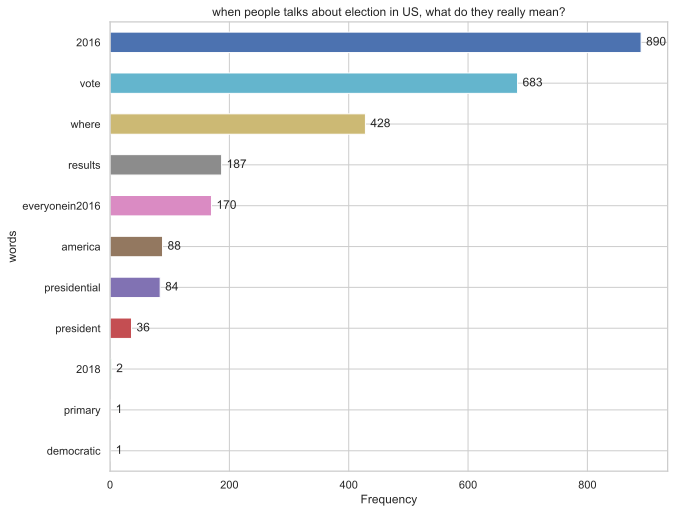

In [225]:
word_count = pd.Series(final_word_list).value_counts().sort_values()[0:15] 
frequencies = word_count.values.tolist()
freq_series = pd.Series.from_array(frequencies)
y_labels = word_count.index.tolist()
plt.figure(figsize=(10,8.27)) 
ax = freq_series.plot(kind='barh')
ax.set_title('when people talks about election in US, what do they really mean?')
ax.set_ylabel('words')
ax.set_xlabel('Frequency')
ax.set_yticklabels(y_labels)

rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5 # Number of points between bar and label
    label = "{}".format(x_value)
    # Create annotation
    plt.annotate(label, (x_value, y_value),xytext=(space, 0), textcoords="offset points", va='center')               
                            
plt.savefig("barplot.png")

# 2016 eletion is what people talks about.

***